# Shared genes phenotypes

###### First version 17/06/2022
###### Latest modif 29/11/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from datetime import datetime
import os
import glob
#from pySankey.sankey import sankey
import imageio
from pandas.plotting import parallel_coordinates

DATE = datetime.now().strftime("%Y-%m-%d")

In [44]:
p_value_min = 5.7  # -math.log10(0.05/len(x))
directory_genes='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/2022_11_23_covar_fix/'
save_dir= '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/figures/'
type_phenots='main' # supplementary, main
if type_phenots=='main':
    ##### MAIN PHENOTYPES
    MAIN_LABELS='mean_angle_taa,mean_angle_tva,tau1_vein,tau1_artery,ratio_AV_DF,eq_CRAE,ratio_CRAE_CRVE,D_A_std,D_V_std,eq_CRVE,ratio_VD,VD_orig_artery,bifurcations,VD_orig_vein,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
    MAIN_NAMES='A temporal angle,V temporal angle,V tortuosity,A tortuosity,ratio tortuosity,A central retinal eq,ratio central retinal eq,A std diameter,V std diameter,V central retinal eq,ratio vascular density,A vascular density,bifurcations,V vascular density,A median diameter,V median diameter,ratio median diameter'
    all_files = list(MAIN_LABELS.split(","))
    all_files_new = list(MAIN_NAMES.split(","))
    df_i=pd.read_csv('/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/figures/intersections_all_main_vZekavat.csv')

elif type_phenots=='supplementary':
    #### SUPPLEMENTARY PHENOTYPES
    SUPPLEMENTARY_LABELS='tau1_all,tau1_artery,tau1_vein,ratio_AV_DF,tau2_all,tau2_artery,tau2_vein,tau4_all,tau4_artery,tau4_vein,D_std,D_A_std,D_V_std,D_CVMe,D_CVMe_A,D_CVMe_V,sd_mean_size,N_median_main_arteries,N_median_main_veins,arcLength_artery,arcLength_vein,bifurcations,VD_orig_all,VD_orig_artery,VD_orig_vein,ratio_VD,FD_all,FD_artery,FD_vein,mean_angle_taa,mean_angle_tva,eq_CRAE,eq_CRVE,median_CRAE,median_CRVE,CRAE,CRVE,ratio_CRAE_CRVE,ratio_median_CRAE_CRVE,ratio_standard_CRE,medianDiameter_all,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
    SUPPLEMENTARY_NAMES='tortuosity,A tortuosity,V tortuosity,ratio tortuosity,tortuosity2,A tortuosity2,V tortuosity2,tortuosity3,A tortuosity3,V tortuosity3,std diameter,A std diameter,V std diameter,CVMe diameter,A CVMe diameter,V CVMe diameter,std norm diameter,A num main,V num main,A arc length,V arc length,bifurcations,vascular density,A vascular density,V vascular density,ratio vascular density,fractal dimension,A fractal dimension,V fractal dimension,A temporal angle,V temporal angle,A central retinal eq,V central retinal eq,A main diameter,V main diameter,A central retinal eq2,V central retinal eq2,ratio central retinal eq,ratio main diameter,ratio central retinal eq2,median diameter,A median diameter,V median diameter,ratio median diameter'
    all_files = list(SUPPLEMENTARY_LABELS.split(","))
    all_files_new = list(SUPPLEMENTARY_NAMES.split(","))
    df_i=pd.read_csv('/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/figures/intersections_all_suplementary_vZekavat.csv')




In [55]:
mapping_labels = dict(zip(all_files, all_files_new))
mapping_order = dict(zip(all_files_new, list(range(len(all_files_new)))))

In [46]:
mapping_labels

{'mean_angle_taa': 'A temporal angle',
 'mean_angle_tva': 'V temporal angle',
 'tau1_vein': 'V tortuosity',
 'tau1_artery': 'A tortuosity',
 'ratio_AV_DF': 'ratio tortuosity',
 'eq_CRAE': 'A central retinal eq',
 'ratio_CRAE_CRVE': 'ratio central retinal eq',
 'D_A_std': 'A std diameter',
 'D_V_std': 'V std diameter',
 'eq_CRVE': 'V central retinal eq',
 'ratio_VD': 'ratio vascular density',
 'VD_orig_artery': 'A vascular density',
 'bifurcations': 'bifurcations',
 'VD_orig_vein': 'V vascular density',
 'medianDiameter_artery': 'A median diameter',
 'medianDiameter_vein': 'V median diameter',
 'ratio_AV_medianDiameter': 'ratio median diameter'}

In [48]:
df_i

,Unnamed: 0,gen,p,file_col,-log10(p)
0,23070,EIF3K,3.331784e-145,tau1_vein,144.477323
1,23075,ACTN4,2.041491e-138,tau1_vein,137.690053
2,23089,LGALS7,5.938102e-138,tau1_vein,137.226352
3,23086,CAPN12,1.236910e-136,tau1_vein,135.907662
4,16481,COL4A2,7.638869e-136,tau1_artery,135.116971
...,...,...,...,...,...
1022,8928,ATF6B,1.932084e-06,D_V_std,5.713974
1023,4340,BSN-AS2,1.934997e-06,tau1_vein,5.713320
1024,9086,POU5F1,1.939395e-06,tau1_vein,5.712334
1025,5810,FGFR3,1.944417e-06,ratio_AV_DF,5.711211


In [49]:
df_i['gen'].value_counts().index

Index(['CTC-498M16.4', 'LINC00461', 'HERC2', 'C14orf39', 'FGF21', 'OCA2',
       'FLT1', 'CTD-2568P8.1', 'IZUMO1', 'EIF3K',
       ...
       'STK25', 'FAM219B', 'ENG', 'COX5A', 'RP11-731F5.2', 'SLC35G5',
       'RP11-293E1.1', 'RP11-293E1.2', 'RNF39', 'FGFR3'],
      dtype='object', length=634)

In [50]:
list_genes=list(df_i['gen'].value_counts().head(30).index)
list_genes

['CTC-498M16.4',
 'LINC00461',
 'HERC2',
 'C14orf39',
 'FGF21',
 'OCA2',
 'FLT1',
 'CTD-2568P8.1',
 'IZUMO1',
 'EIF3K',
 'ACP1',
 'SIX6',
 'SH3YL1',
 'AC079779.5',
 'FAM150B',
 'AC079779.6',
 'SIX1',
 'ACTN4',
 'NTN5',
 'RP11-1042B17.5',
 'FUT1',
 'LGALS7',
 'RASIP1',
 'FUT2',
 'CAPN12',
 'MAMSTR',
 'SIX5',
 'LGALS4',
 'NPLOC4',
 'PDE6G']

In [51]:
df_reduc = df_i[df_i['gen'].isin(list_genes)]
df_reduc

,Unnamed: 0,gen,p,file_col,-log10(p)
0,23070,EIF3K,3.331784e-145,tau1_vein,144.477323
1,23075,ACTN4,2.041491e-138,tau1_vein,137.690053
2,23089,LGALS7,5.938102e-138,tau1_vein,137.226352
3,23086,CAPN12,1.236910e-136,tau1_vein,135.907662
8,23091,LGALS4,3.624842e-97,tau1_vein,96.440711
...,...,...,...,...,...
980,22205,ACTN4,1.470969e-06,eq_CRVE,5.832396
987,22207,LGALS7,1.528195e-06,eq_CRVE,5.815821
998,22080,FGF21,1.651636e-06,ratio_AV_medianDiameter,5.782086
1018,22206,CAPN12,1.840574e-06,eq_CRVE,5.735047


In [52]:
df_reduc['file_col'] = df_reduc['file_col'].map(mapping_labels)

/tmp/ipykernel_10425/3120248812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduc['file_col'] = df_reduc['file_col'].map(mapping_labels)


In [60]:
df_reduc['order']= df_reduc['file_col'].map(mapping_order)
df_reduc.sort_values(by='order', ascending=False, inplace=True)

/tmp/ipykernel_10425/1150955738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduc['order']= df_reduc['file_col'].map(mapping_order)
/tmp/ipykernel_10425/1150955738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduc.sort_values(by='order', ascending=False, inplace=True)


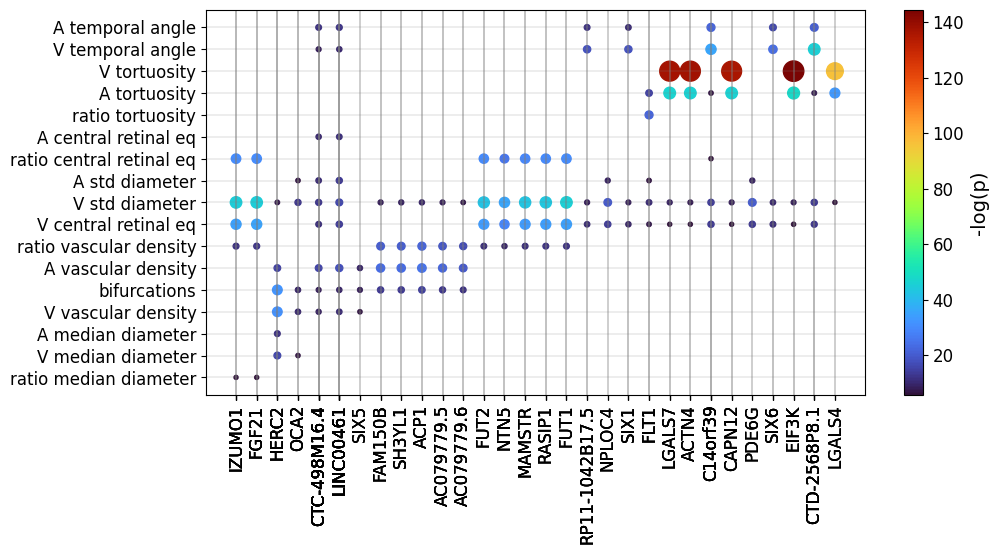

In [71]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
if type_phenots=='main':
    plt.figure(figsize=(10, 5))
    name_save='main_genes_phenotypes_scatterplots_25_11_2022.png'
elif type_phenots=='supplementary':
    plt.figure(figsize=(15, 12))
    name_save='sup_genes_phenotypes_scatterplots_25_11_2022.png'
#plt.xlabel('Genes') 
#plt.ylabel('Phenotypes')

plt.rcParams['font.size'] = '12'
plt.scatter(df_reduc['gen'], df_reduc['file_col'], cmap='turbo', c=df_reduc['-log10(p)'], s=1.5*df_reduc['-log10(p)'])
cbar= plt.colorbar(fraction=0.1)
cbar.set_label('-log(p)')
plt.grid(color='gray', linestyle='-', linewidth=0.2)
#plt.stem(df_reduc['gen'], df_reduc['file_col'],  basefmt = " ") #markerfmt='.',
plt.xticks(df_reduc['gen'], rotation=90)
plt.savefig('/SSD/home/sofia/' + name_save ,  transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=150)


### - SELECT GENES THAT APPEAR IN THE GWAS CATALOG AND IN THE PHENOTYPES

In [10]:
l_genes_shared_all= []

for file in all_files:
    print(file)
    # Read csvs
    df = pd.read_csv(directory_genes+file+'__gene_scores', delimiter='\t', names =['gen', 'p']) #, index_col=None, header=0)
    df['file_col']=file

    # From p to -log10(p)
    df['-log10(p)'] = -np.log10(df['p'])
    y = df[df['-log10(p)'] >= p_value_min]
    df_significant = y.sort_values('-log10(p)', ascending=False)
    phenotype_genes=df_significant['gen'].to_list()
    print(file, phenotype_genes, '\n')

tau1_artery
tau1_artery ['COL4A2', 'EIF3K', 'LGALS7', 'ACTN4', 'CAPN12', 'RP11-21I10.2', 'LGALS7B', 'CA14', 'APH1A', 'C1orf54', 'C1orf51', 'MRPS21', 'MAP4K1', 'PRPF3', 'MYOZ2', 'ANP32E', 'TNS1', 'LGALS4', 'LINC00568', 'CTD-2378E21.1', 'PDE3A', 'LHFPL2', 'ECM1', 'CSK', 'LMAN1L', 'CYP1A2', 'CPLX3', 'SYNPO2', 'ULK3', 'RPRD2', 'SH3TC1', 'HTRA3', 'AL356356.1', 'SCAMP2', 'TEX22', 'ADAMTSL4', 'TARS2', 'CYP1A1', 'ANO1', 'MPI', 'FAM219B', 'COX5A', 'LRCH1', 'FADD', 'RPP25', 'STRIP1', 'RP11-455G16.1', 'ALX3', 'ECH1', 'USP53', 'AC104534.3', 'UBL4B', 'RP11-675F6.4', 'AC017002.2', 'AC017002.1', 'RP11-675F6.3', 'C4orf3', 'ADAMTSL4-AS1', 'MTA1', 'FABP2', 'RP1-78O14.1', 'AL031590.1', 'RP11-774O3.2', 'RP11-774O3.1', 'AHCYL1', 'CRIP2', 'AC011243.1', 'SCAMP5', 'PAWR', 'CRIP1', 'C14orf80', 'FLT1', 'HNRNPL', 'PDE5A', 'KDM1A', 'RP11-189B4.6', 'TMEM121', 'PDGFB', 'RP11-359M6.1', 'NCKAP5', 'LUZP1', 'RYR1', 'C1orf234', 'PPCDC', 'LACTBL1', 'C8orf86', 'MCL1', 'GCAT', 'H1F0', 'RAB20', 'GALR3', 'TMOD3', 'TMOD2', 'T

In [9]:
phenotype_genes

['FGF21', 'IZUMO1']

#### Note -> all_GWAScatalog contain all the traits (not yet filtered by etnicity)

In [5]:
#f_genes_count[df_genes_count['Unnamed: 0']=='CTD-2008P7.9']

In [6]:
df_gene_disease = pd.read_csv(save_dir + '2022_08_17_all_GWAScatalog_ventile4.csv')
df_gene_disease

#os.chdir(save_dir)
#for file_name in glob.glob("*GWAScatalog_ventile4.csv"):
    #print(file_name)
    #df_gene_disease = pd.read_csv(save_dir + file_name)


,Unnamed: 0,MAPPED_TRAIT,gene,INITIAL SAMPLE SIZE,Trait
0,0,arterial stiffness measurement,COL4A1,"4,221 Sardinian individuals",tau1_artery
1,1,Ischemic stroke,LRCH1,"34,217 European ancestry cases, 406,111 Europe...",tau1_artery
2,2,Ischemic stroke,LRCH1,"34,217 European ancestry cases, 406,111 Europe...",tau1_artery
3,3,"Ischemic stroke, venous thromboembolism, strok...",PROCR,"6,135 European ancestry cases, 252,827 Europea...",tau1_artery
4,4,"HDL cholesterol change measurement, response t...",TGFBR3,"781 European ancestry individuals, 138 African...",tau1_artery
...,...,...,...,...,...
539,539,vitamin B12 measurement,FUT2,"1,725 European ancestry cases, 258 African anc...",ratio_AV_medianDiameter
540,540,vitamin B12 measurement,FUT2,"1,725 European ancestry cases, 258 African anc...",ratio_AV_medianDiameter
541,541,vitamin B12 measurement,FUT2,"1,725 European ancestry cases, 258 African anc...",ratio_AV_medianDiameter
542,542,vitamin B12 measurement,FUT2,"1,725 European ancestry cases, 258 African anc...",ratio_AV_medianDiameter


### - Filter by etnicity

In [10]:
df_gene_disease_filtered = df_gene_disease[df_gene_disease["INITIAL SAMPLE SIZE"].str.contains("European" or "British")]
print('Len before and after filter by etnicity: ', len(df_gene_disease), len(df_gene_disease_filtered))
df_gene_disease_filtered

Len before and after filter by etnicity:  544 447


,Unnamed: 0,MAPPED_TRAIT,gene,INITIAL SAMPLE SIZE,Trait
1,1,Ischemic stroke,LRCH1,"34,217 European ancestry cases, 406,111 Europe...",tau1_artery
2,2,Ischemic stroke,LRCH1,"34,217 European ancestry cases, 406,111 Europe...",tau1_artery
3,3,"Ischemic stroke, venous thromboembolism, strok...",PROCR,"6,135 European ancestry cases, 252,827 Europea...",tau1_artery
4,4,"HDL cholesterol change measurement, response t...",TGFBR3,"781 European ancestry individuals, 138 African...",tau1_artery
5,5,"refractive error, age at onset, Myopia",PDE3A,"145,366 European ancestry individuals, 2,610 E...",tau1_artery
...,...,...,...,...,...
539,539,vitamin B12 measurement,FUT2,"1,725 European ancestry cases, 258 African anc...",ratio_AV_medianDiameter
540,540,vitamin B12 measurement,FUT2,"1,725 European ancestry cases, 258 African anc...",ratio_AV_medianDiameter
541,541,vitamin B12 measurement,FUT2,"1,725 European ancestry cases, 258 African anc...",ratio_AV_medianDiameter
542,542,vitamin B12 measurement,FUT2,"1,725 European ancestry cases, 258 African anc...",ratio_AV_medianDiameter


### - Rename diseases and delete non relevants
#### In the GWAS catalog sometimes the names are pretty long, after a first inspection, go back here and rename them

In [11]:
df_gene_disease_filtered['disease']= df_gene_disease_filtered['MAPPED_TRAIT']

## 'age at diagnosis, type 1 diabeter mellitus' -> 'type 1 diabeter mellitus'
df_gene_disease_filtered['disease']=df_gene_disease_filtered['disease'].replace("age at diagnosis, type 1 diabetes mellitus","type 1 diabeter mellitus")
df_gene_disease_filtered['disease']=df_gene_disease_filtered['disease'].replace("autoimmune thyroid disease, obsolete_common variable immunodeficiency, type 1 diabetes mellitus, ankylosing spondylitis, psoriasis, celiac disease, ulcerative colitis, Crohn's disease, autoimmune disease, juvenile idiopathic arthritis, systemic lupus erythematosus","type 1 diabeter mellitus")
df_gene_disease_filtered['disease']=df_gene_disease_filtered['disease'].replace("HDL cholesterol change measurement, response to fenofibrate","HDL cholesterol change measurement")
df_gene_disease_filtered['disease']=df_gene_disease_filtered['disease'].replace("HDL cholesterol change measurement, response to simvastatin, response to fenofibrate","HDL cholesterol change measurement")
df_gene_disease_filtered['disease']=df_gene_disease_filtered['disease'].replace("refractive error, age at onset, Myopia","Myopia")
df_gene_disease_filtered['disease']=df_gene_disease_filtered['disease'].replace("cutaneous melanoma, hair color","hair color")
df_gene_disease_filtered['disease']=df_gene_disease_filtered['disease'].replace("systolic blood pressure, alcohol drinking","systolic blood pressure")
df_gene_disease_filtered['disease']=df_gene_disease_filtered['disease'].replace("diastolic blood pressure, alcohol drinking","diastolic blood pressure")

## 'autoimmune thyroid disease, obsolete_common variable immunodeficiency, type 1 diabetes mellitus, ankylosing spondylitis, psoriasis, celiac disease, ulcerative colitis, Crohn's disease, autoimmune disease, juvenile idiopathic arthritis, systemic lupus erythematosus' -> 'type 1 diabeter mellitus'
#### DROP NON RELEVANT DISEASES:
drop_disease_list = ["response to darapladib, Diarrhea", "vitamin B12 measurement",
                    'heart rate response to exercise']

for i_disease in drop_disease_list:
    df_gene_disease_filtered.drop(df_gene_disease_filtered.loc[df_gene_disease_filtered['disease']==i_disease].index, inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

### - Drop duplicated columns

In [12]:
df_gene_disease_filtered.drop(columns=['Unnamed: 0', 'MAPPED_TRAIT'], inplace=True)
print(len(df_gene_disease_filtered))
df_gene_disease_filtered.drop_duplicates(subset=None, keep='first', inplace=True)
print(len(df_gene_disease_filtered))

427
132


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### SHOW RESULTS:

### A) Show results TEXT: 

In [13]:
# Relevant columns df_gene_disease_filtered['gene', 'Trait', 'disease']
diseases_list = df_gene_disease_filtered['disease'].to_list()

mylist = list(dict.fromkeys(diseases_list))
print(mylist)

['Ischemic stroke', 'Ischemic stroke, venous thromboembolism, stroke, Abnormal thrombosis, deep vein thrombosis, pulmonary embolism', 'HDL cholesterol change measurement', 'Myopia', 'heart rate', 'type 1 diabetes mellitus', 'type 2 diabetes mellitus', 'diastolic blood pressure', 'myocardial infarction', 'stroke', 'coronary artery disease', 'cataract', 'systolic blood pressure', 'arterial stiffness measurement', 'type 1 diabeter mellitus', 'venous thromboembolism', 'resting heart rate', 'type 2 diabetes mellitus, coronary artery disease', 'eye color', 'pathological myopia', 'hair color', 'cardioembolic stroke', 'skin pigmentation', 'large artery stroke', 'body mass index, coronary artery disease']


In [30]:
df_new=pd.DataFrame([])
for i in range(len(mylist)):
    print(mylist[i])
    df_aux = df_gene_disease_filtered[df_gene_disease_filtered['disease']== mylist[i]]
    print(df_aux)
    print('\n')


Ischemic stroke
      gene                                INITIAL SAMPLE SIZE        Trait  \
1    LRCH1  34,217 European ancestry cases, 406,111 Europe...  tau1_artery   
65   LRCH1  34,217 European ancestry cases, 406,111 Europe...  ratio_AV_DF   
97   PDE3A  34,217 European ancestry cases, 406,111 Europe...      D_A_std   
129  SH2B3  34,217 European ancestry cases, 406,111 Europe...      D_V_std   
257   ILF3  34,217 European ancestry cases, 406,111 Europe...     ratio_VD   
385  SH2B3  34,217 European ancestry cases, 406,111 Europe...      eq_CRVE   

             disease  
1    Ischemic stroke  
65   Ischemic stroke  
97   Ischemic stroke  
129  Ischemic stroke  
257  Ischemic stroke  
385  Ischemic stroke  


Ischemic stroke, venous thromboembolism, stroke, Abnormal thrombosis, deep vein thrombosis, pulmonary embolism
    gene                                INITIAL SAMPLE SIZE        Trait  \
3  PROCR  6,135 European ancestry cases, 252,827 Europea...  tau1_artery   

          

### B) Plots

#### B1)  STEM PLOT VASCULAR GENES (PASCAL)

([<matplotlib.axis.XTick at 0x7f05a1c7d160>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

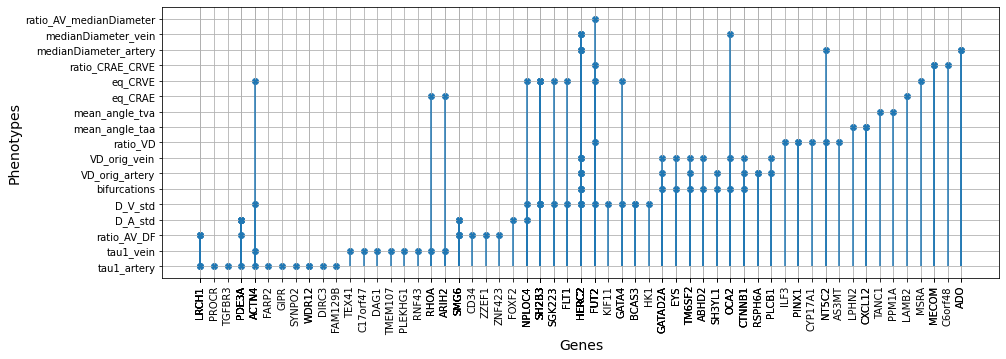

In [17]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.figure(figsize=(15, 5))
plt.xlabel('Genes')
plt.ylabel('Phenotypes')

plt.scatter(df_gene_disease_filtered['gene'], df_gene_disease_filtered['Trait'])
plt.grid()
plt.stem(df_gene_disease_filtered['gene'], df_gene_disease_filtered['Trait'], markerfmt='.', basefmt = " ")
plt.xticks(df_gene_disease_filtered['gene'], rotation=90)
#plt.savefig('/Users/sortinve/Desktop/General_PhD/Presentaciones_PhD/Poster_eccb2022/genes_phenos.png',  transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=150)


#### B2)  STEM PLOT DISEASES GENES (GWAS CATALOG)

([<matplotlib.axis.XTick at 0x7f05999dfa90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

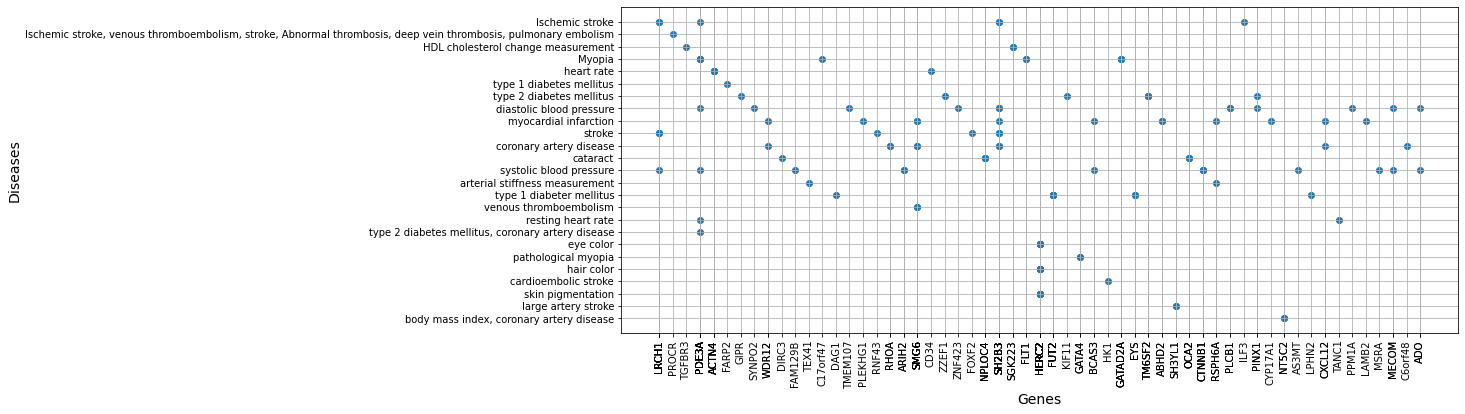

In [18]:
plt.figure(figsize=(15, 6))
plt.xlabel('Genes')
plt.ylabel('Diseases')

plt.scatter(df_gene_disease_filtered['gene'], df_gene_disease_filtered['disease'])
plt.grid()
plt.gca().invert_yaxis()
plt.xticks(df_gene_disease_filtered['gene'], rotation=90)
#plt.savefig('/Users/sortinve/Desktop/General_PhD/Presentaciones_PhD/Poster_eccb2022/genes_diseases.png',  transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=150)


#### B3)  STEM PLOT TRYING TO COMBAIN THE VASCULAR GENES (PASCAL) AND THE DISEASES GENES (GWAS CATALOG)

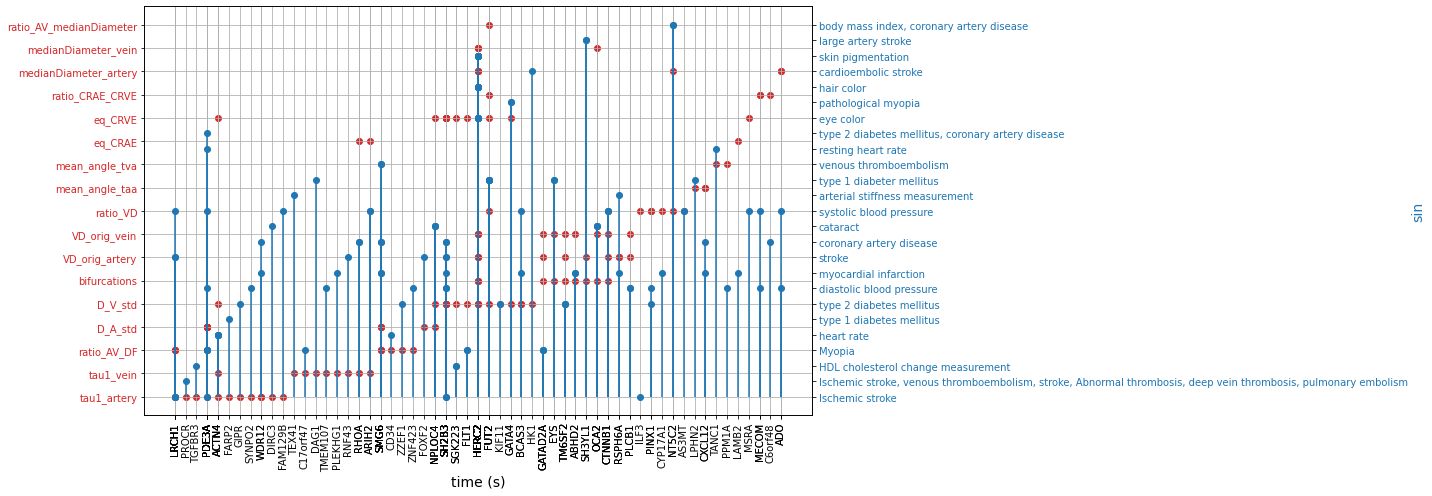

In [23]:
fig, ax1 = plt.subplots(figsize=(20, 7))
plt.grid()
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.scatter(df_gene_disease_filtered['gene'], df_gene_disease_filtered['Trait'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(df_gene_disease_filtered['gene'], rotation=90)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.scatter(df_gene_disease_filtered['gene'], df_gene_disease_filtered['disease'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
#plt.hlines(y=df_gene_disease_filtered['Trait'], xmin=0, xmax=df_gene_disease_filtered['Trait'], color='skyblue')
ax2.stem(df_gene_disease_filtered['gene'], df_gene_disease_filtered['disease'], markerfmt='.', basefmt = " ")


plt.xticks(df_gene_disease_filtered['gene'], rotation=90)
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped

#plt.stem(df_gene_disease_filtered['gene'], df_gene_disease_filtered['Trait'], markerfmt='.', basefmt = " ")
plt.grid()
#plt.savefig('/Users/sortinve/Desktop/General_PhD/Presentaciones_PhD/Poster_eccb2022/genes_phenos.png',  transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=150)
plt.show()

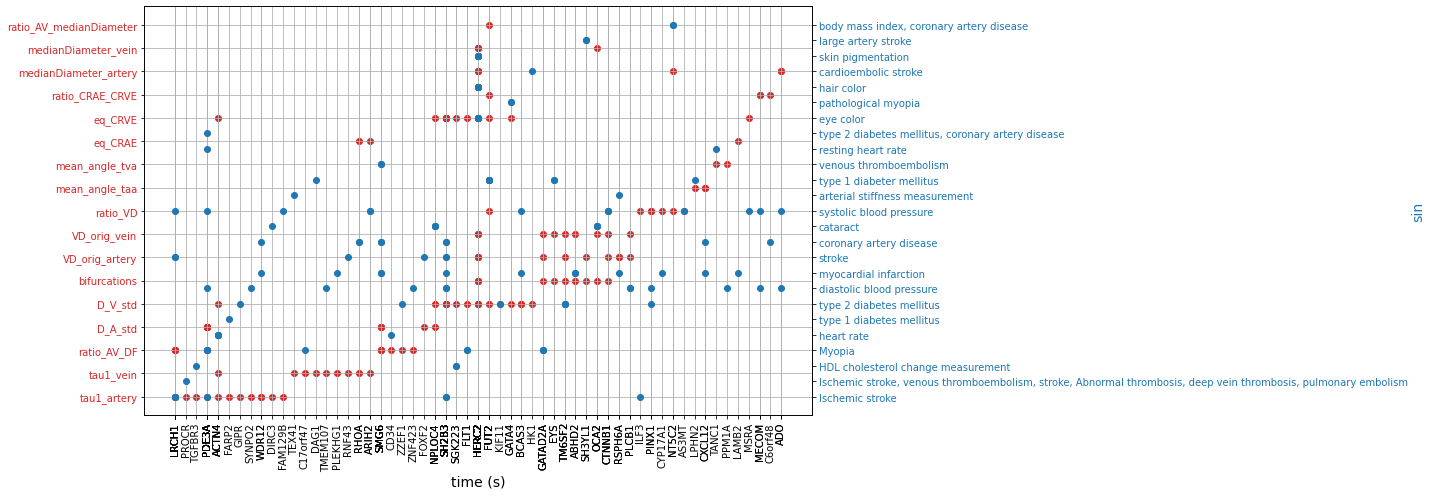

In [24]:
fig, ax1 = plt.subplots(figsize=(20, 7))
plt.grid()
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.scatter(df_gene_disease_filtered['gene'], df_gene_disease_filtered['Trait'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(df_gene_disease_filtered['gene'], rotation=90)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.scatter(df_gene_disease_filtered['gene'], df_gene_disease_filtered['disease'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
#plt.hlines(y=df_gene_disease_filtered['Trait'], xmin=0, xmax=df_gene_disease_filtered['Trait'], color='skyblue')
#ax2.stem(df_gene_disease_filtered['gene'], df_gene_disease_filtered['disease'], markerfmt='.', basefmt = " ")


plt.xticks(df_gene_disease_filtered['gene'], rotation=90)
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped

#plt.stem(df_gene_disease_filtered['gene'], df_gene_disease_filtered['Trait'], markerfmt='.', basefmt = " ")
plt.grid()
#plt.savefig('/Users/sortinve/Desktop/General_PhD/Presentaciones_PhD/Poster_eccb2022/genes_phenos.png',  transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=150)
plt.show()

#### B4)  SANKEY PLOT VASCULAR GENES

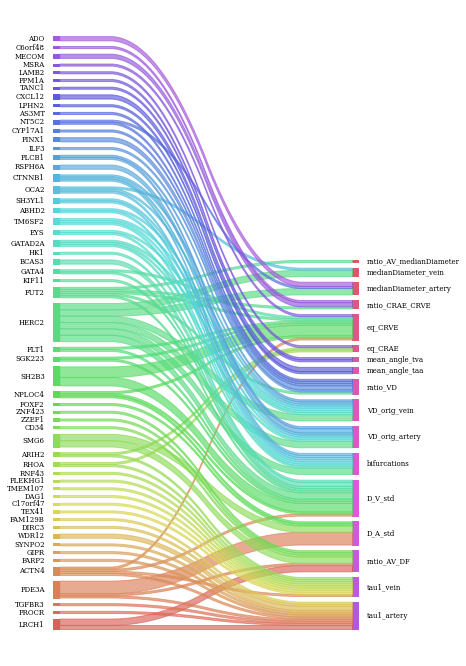

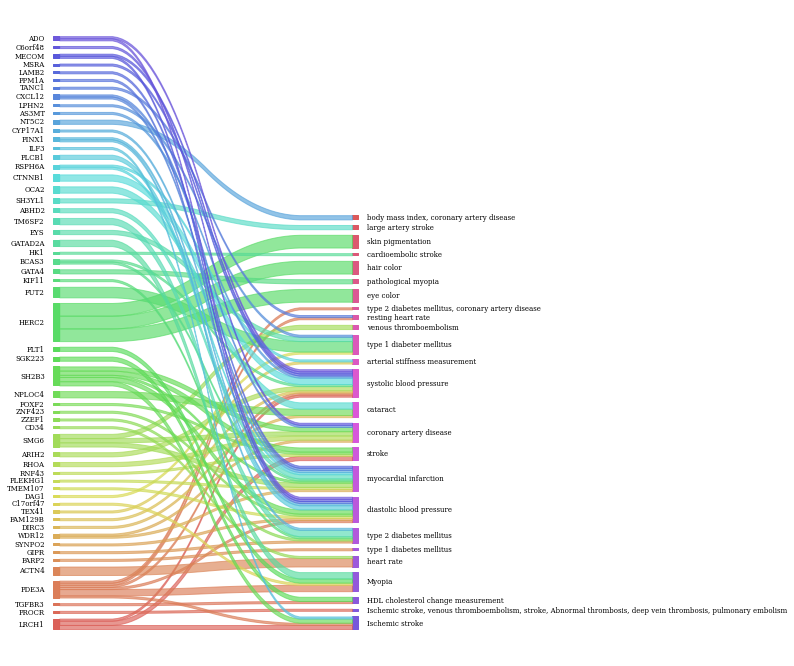

In [26]:
sankey(df_gene_disease_filtered['gene'], df_gene_disease_filtered['Trait'],  aspect=10, fontsize=7)
# Get current figure
#plt.gca().invert_yaxis()
fig = plt.gcf()
# Set size in inches
fig.set_size_inches(6, 12)
# Set the color of the background to white
fig.set_facecolor("w")
#fig.savefig("/SSD/home/sofia/gene_trait.png", bbox_inches="tight", dpi=150)

sankey(df_gene_disease_filtered['gene'], df_gene_disease_filtered['disease'],  aspect=10, fontsize=7)
# Get current figure
fig = plt.gcf()
# Set size in inches
fig.set_size_inches(6, 12)
# Set the color of the background to white
fig.set_facecolor("w")
#fig.savefig("/SSD/home/sofia/gene_disease.png", bbox_inches="tight", dpi=150)
#fig.show()

In [27]:
### FLIP THE IMAGE TO MIRROR IT

In [ ]:
im = imageio.imread('/SSD/home/sofia/gene_trait.png') 
fig, ax1 = plt.subplots(figsize=(6, 12))
ax1.imshow(im[:, ::-1, :])

#fig.savefig("/SSD/home/sofia/gene_trait_reflejada.png", bbox_inches="tight", dpi=150)

In [ ]:
data = sns.load_dataset('iris')
print(data)
# Make the plot
parallel_coordinates(data, 'species', colormap=plt.get_cmap("Set2"))
plt.show()